In [1]:
from SimPEG import Mesh, Maps, Utils
from simpegEM1D import (
    EM1D, 
    EM1DSurveyTD, 
    Utils1D, 
    get_vertical_discretization_time, 
    set_mesh_1d
)
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Consider three layer model
dummy_thickness = 50.
# We only need two thicknesses, so the last one is dummy)
hz = np.r_[10, 20, dummy_thickness]
rho = np.r_[20, 50, 20]

In [9]:
# Time channels to be calculated
time = np.logspace(-5, -2, 31)

In [11]:
# Generate 1D mesh
mesh1D = set_mesh_1d(hz)

In [17]:
# Depth of the layer boundaries
# src_type: CircularLoop assumes a cirular loop with radius of a
# and rx is located at the center of the source loop
depth = -mesh1D.gridN[:-1]
elevation = 0.
TDsurvey = EM1DSurveyTD(
    rx_location = np.array([0., 0., elevation+30.]),
    src_location = np.array([0., 0., elevation+30.]),
    topo = np.r_[0., 0., elevation],
    depth = depth,
    rx_type = 'dBzdt',
    wave_type = 'stepoff',
    src_type = 'CircularLoop',
    a = 13.,
    time = time,
)

Text(0.5, 0, 'Resistivity (ohm-m)')

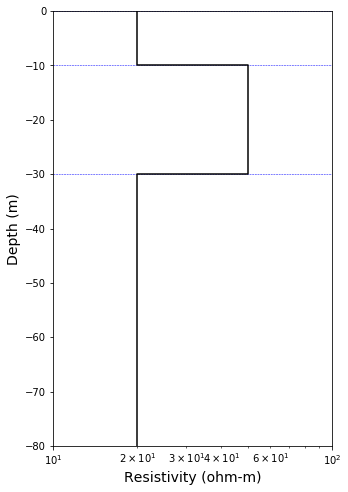

In [18]:
# Plot 1D resistivity model
fig, ax = subplots(1,1, figsize=(5, 8))
out = Utils1D.plotLayer(rho, mesh1D, showlayers=True)
ax.set_xlabel("Resistivity (ohm-m)")

In [20]:
# sigmaMap=Maps.IdentityMap(mesh1D) is assuming your model is equal to sigma
# this mapping function is used later for the inversion

prob = EM1D(mesh1D, sigmaMap=Maps.IdentityMap(mesh1D), verbose=False)
if prob.ispaired:
    prob.unpair()
if TDsurvey.ispaired:
    TDsurvey.unpair()
prob.pair(TDsurvey)
d_true = TDsurvey.dpred(1./rho)

Text(0, 0.5, 'Voltage (V/A)')

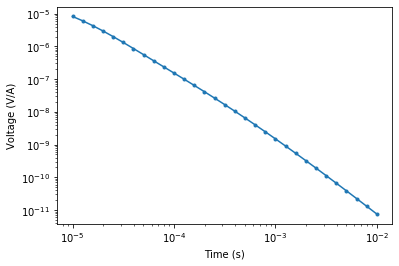

In [21]:
plt.loglog(TDsurvey.time, -d_true, '.-')
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V/A)")